#Laboratorio Divergencia de Kullback-Leibler
__Escuela Tecnológica Instituto Técnico Central__\
__Ingeniería de Sistemas__\
***Electiva  Técnica IV: Ciencia de Datos*** \
*Profesor: Elias Buitrago Bolivar* \

Durante el desarrollo del presente laboratorio se pondrá a prueba el concepto de divergencia de Kullback-Leibler (divergencia KL), mediante casos de uso que permitan entender su aplicabilidad en problemas reales de ciencia de datos. Se inicia contextualizando el conceptos de variables, estadística y probabilidad como marco introductorio. Luego, se describen dos casos de estudio con datos reales en los cuales se aplica la divergencia en KL, incluyendo el respectivo código en Python para resolver. Finalmente, se plantean dos ejercicios con datos reales para resolver siguiendo los casos de uso explicados.  

## Introducción

Si bien este laboratorio no está enfocado estrictamente a estudiar distribuciones de probabilidad, a continuación se brinda una breve contexto, antes de abordar el tópico de interés: la utilidad de la divergencia de Kullback-Leibler.

El análisis de datos moderno, los modelos de aprendizaje automático y las técnicas de inteligencia artificial actuales, tienen un fuerte soporte en la estadística y la probabilidad. Por lo tanto, hablar sobre modelo de aprendizaje, modelos predictivos o prescriptivos, implican repasar conceptos y técnicas estadísticas y probabilísticas, orientadas a explorar y entender el insumo principal: los datos. Los datos, en el argot de la estadística, son variables que representan mediciones o magnitudes cuantitativas de fenómenos físicos tangibles. Al respecto, vale la pena revisar la siguiente argumentación [1]:

*Los valores de una variable sirven para describir o clasificar individuos o distinguir entre ellos. La mayoría de nosotros hacemos algo más que simplemente describir, clasificar o distinguir, porque tenemos ideas respecto a las frecuencias relativas de los valores de una variable. En estadística decimos que la variable tiene una función de probabilidad, una función de densidad de probabilidad o simplemente una función de distribución*. Tomado de [1].

A partir de ese concepto de datos, orientado hacía aplicaciones prácticas, podemos saltar hacía definiciones aplicadas de probabilidad. Y es que existen, diversas funciones matemáticas de probabilidad (conocidas como distribuciones de probabilidad). Por lo tanto, en el contexto de la ciencia de datos surge una pregunta básica: ¿Para que nos sirve determinar la distribución de probabilidad de una variable?  Pues, la utilidad más importante tiene que ver con la posibilidad de  realizar inferencias (predicciones) y tomar decisiones en situaciones de incertidumbre, como lo mencionan [1]:

*Las distribuciones de probabilidad están relacionadas con la distribución de frecuencias. De hecho, podemos pensar en la distribución de probabilidad como una distribución de frecuencias teórica. Una distribución de frecuencias teórica es una distribución de probabilidades que describe la forma en que se espera que varíen los resultados. Debido a que estas distribuciones tratan sobre expectativas de que algo suceda, resultan ser modelos útiles para hacer inferencias y tomar decisiones de incertidumbre*. Tomado de [1].


## Caso de estudio \#1: Evaluación de la Diferencia en el Peso entre Atún y Salmón

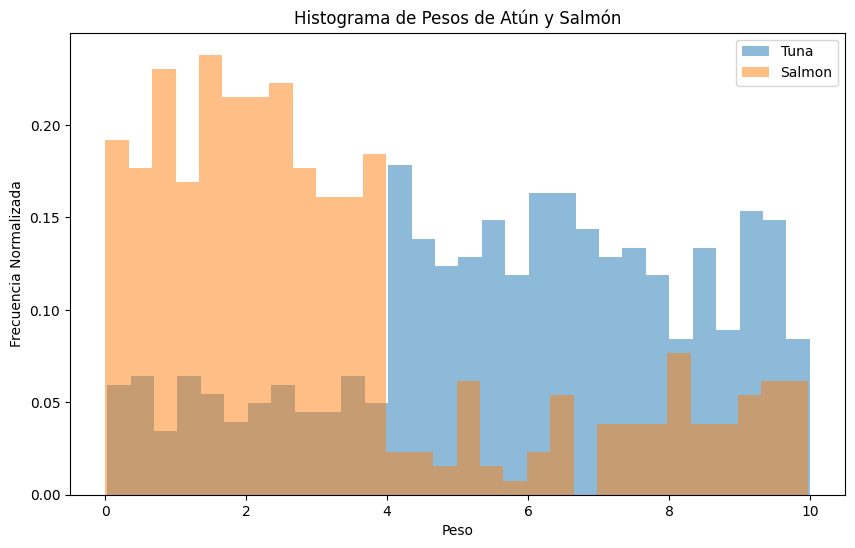

In [2]:
#Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, entropy

# Cargar datos desde el enlace CSV
url = "https://github.com/ritvikmath/YouTubeVideoCode/raw/main/fish.csv"
data = pd.read_csv(url)

# Exploración inicial de los datos
plt.figure(figsize=(10, 6))
plt.hist(data[data['type'] == 'tuna']['weight'], bins=30, alpha=0.5, label='Tuna', density=True)
plt.hist(data[data['type'] == 'salmon']['weight'], bins=30, alpha=0.5, label='Salmon', density=True)
plt.title('Histograma de Pesos de Atún y Salmón')
plt.xlabel('Peso')
plt.ylabel('Frecuencia Normalizada')
plt.legend()
plt.show()

Esta gráfica es un histograma que representa la distribución de pesos para las especies Atún (amarillo) y Salmón (azul). Cada barra del histograma representa un intervalo de pesos, y la altura de la barra indica la frecuencia relativa de ocurrencia en ese intervalo. La transparencia (parámetro alpha) se utiliza para visualizar ambas distribuciones superpuestas.

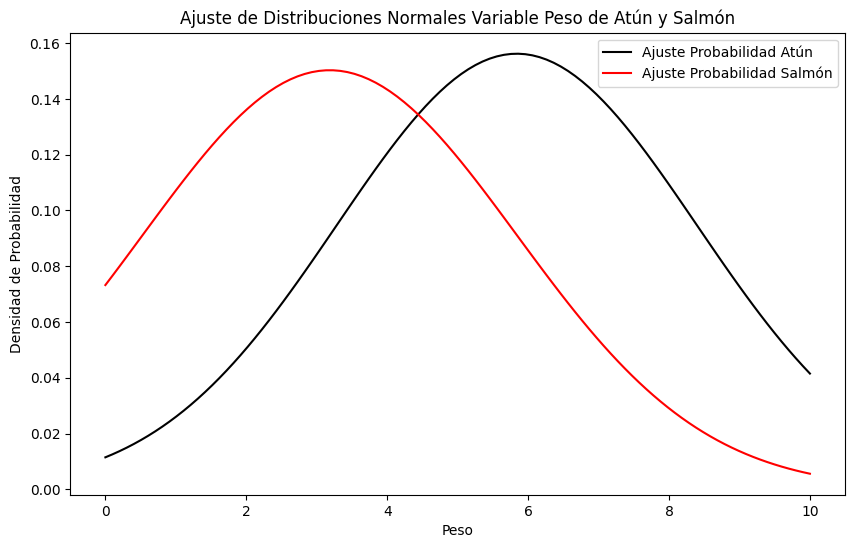

In [3]:
# Ajuste de distribuciones normales a los pesos de cada tipo de pez
mu_atun, std_atun = norm.fit(data[data['type'] == 'tuna']['weight'])
mu_salmon, std_salmon = norm.fit(data[data['type'] == 'salmon']['weight'])

# Visualización de las distribuciones ajustadas
x_peso = np.linspace(data['weight'].min(), data['weight'].max(), 100)
pdf_atun = norm.pdf(x_peso, mu_atun, std_atun)
pdf_salmon = norm.pdf(x_peso, mu_salmon, std_salmon)

plt.figure(figsize=(10, 6))
plt.plot(x_peso, pdf_atun, 'k-', label='Ajuste Probabilidad Atún')
plt.plot(x_peso, pdf_salmon, 'r-', label='Ajuste Probabilidad Salmón')
plt.title('Ajuste de Distribuciones Normales Variable Peso de Atún y Salmón')
plt.xlabel('Peso')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()

Esta gráfica muestra el ajuste de distribuciones normales a los datos de pesos de las especies Atún y Salmón. Cada línea representa la función de densidad de probabilidad (PDF) de una distribución normal ajustada a los datos respectivos. El ajuste se realiza para modelar la forma general de la distribución y entender cómo se compara con los datos reales.

In [4]:
# Cálculo de la divergencia Kullback-Leibler
kl_divergence_peso = entropy(pdf_atun, pdf_salmon)
print(f'Divergencia Kullback-Leibler entre Atún y Salmón (Peso): {kl_divergence_peso}')

Divergencia Kullback-Leibler entre Atún y Salmón (Peso): 0.37256656721773607


La divergencia Kullback-Leibler (KL) se calcula al comparar las distribuciones ajustadas (PDF) de los registros históricos de peso del atún y el salmón. Un valor más alto de la divergencia KL indica una mayor diferencia entre las distribuciones. A continuaicón se desglozan las posibilidades de valores que se podrían obtener de la divergencia KL con su correspondiente interpretación.

 * Valor de 0:
        Un valor de 0 indica que las dos distribuciones son idénticas.
        A medida que el valor de la divergencia KL aumenta, la diferencia entre las distribuciones también aumenta.

* Valor obtenido (0.37256656721773607):
        Indica una diferencia, pero no extremadamente grande, entre las distribuciones de los pesos registrados del atún y del salmón.
        Cuanto más cercano a cero, menor es la discrepancia entre las distribuciones.

La divergencia KL puede entenderse como la cantidad promedio de información adicional necesaria para caracterizar la distribución de probabilidad del peso de cada tipo de pescado. Un valor moderado de divergencia KL sugiere que, aunque existen diferencias estadísticas, las distribuciones del peso de ambos tipos de peces comparten ciertas similitudes. Esta conclusión podría indicar que, en términos de peso, las dos especies no muestran diferencias extremas, pero aún exhiben características distintivas que podrían ser pertinentes para la toma de decisiones.

### Ejercicio complementario
Replique el caso de estudio utilizando la variable *longitud*. Visualice las gráficas y proponga conclusiones pertinentes en las cuales discuta el contraste de los resultados de la variable logitud con los resultados obtenidos previamente para el peso de ambos tipos de pescados. Responda las siguientes preguntas:

1. ¿Cuál de las dos vartiables ofrece mejor información?
2. A partir de los resultados con ambas variables, proponga un escenario en el cual esta metodología le puede aportar a la empresa.
3. Revise el caso de estudio y proponga cómo se puede fortalecer el análisis presentado.

### **Solución:**


Primero replicamos el caso de estudio utilizando la variable longitud.



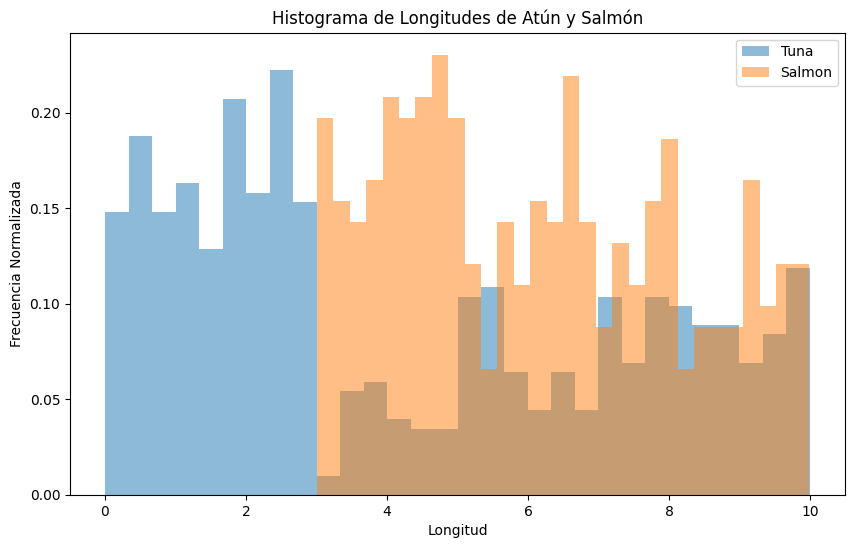

In [5]:
# Exploración inicial de los datos a partir de la replica
plt.figure(figsize=(10, 6))
plt.hist(data[data['type'] == 'tuna']['length'], bins=30, alpha=0.5, label='Tuna', density=True)
plt.hist(data[data['type'] == 'salmon']['length'], bins=30, alpha=0.5, label='Salmon', density=True)
plt.title('Histograma de Longitudes de Atún y Salmón')
plt.xlabel('Longitud')
plt.ylabel('Frecuencia Normalizada')
plt.legend()
plt.show()


In [6]:
# Ajuste de distribuciones normales a las longitudes de cada tipo de pez
mu_atun_len, std_atun_len = norm.fit(data[data['type'] == 'tuna']['length'])
mu_salmon_len, std_salmon_len = norm.fit(data[data['type'] == 'salmon']['length'])


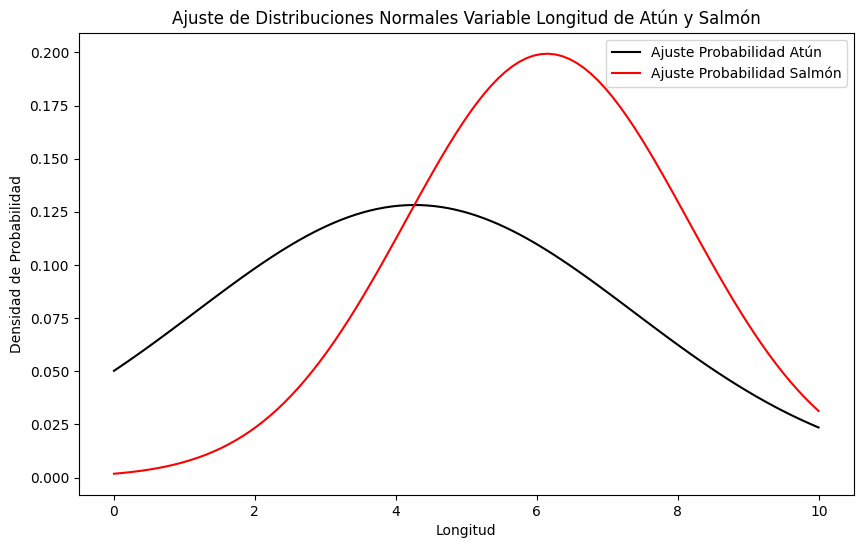

In [7]:
# Visualización de las distribuciones ajustadas
x_longitud = np.linspace(data['length'].min(), data['length'].max(), 100)
pdf_atun_len = norm.pdf(x_longitud, mu_atun_len, std_atun_len)
pdf_salmon_len = norm.pdf(x_longitud, mu_salmon_len, std_salmon_len)

plt.figure(figsize=(10, 6))
plt.plot(x_longitud, pdf_atun_len, 'k-', label='Ajuste Probabilidad Atún')
plt.plot(x_longitud, pdf_salmon_len, 'r-', label='Ajuste Probabilidad Salmón')
plt.title('Ajuste de Distribuciones Normales Variable Longitud de Atún y Salmón')
plt.xlabel('Longitud')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()


In [8]:
# Cálculo de la divergencia Kullback-Leibler
kl_divergence_longitud = entropy(pdf_atun_len, pdf_salmon_len)
print(f'Divergencia Kullback-Leibler entre Atún y Salmón (Longitud): {kl_divergence_longitud}')

Divergencia Kullback-Leibler entre Atún y Salmón (Longitud): 0.3931668175618274


En primer lugar, al analizar los histogramas de las longitudes, se puede notar que la distribución de las longitudes de los atunes parece estar más sesgada hacia la derecha en comparación con la distribución de las longitudes de los salmones. Esto sugiere que, en general, los atunes tienden a ser más largos (con relación al tamaño) que los salmones en la muestra de datos analizada.

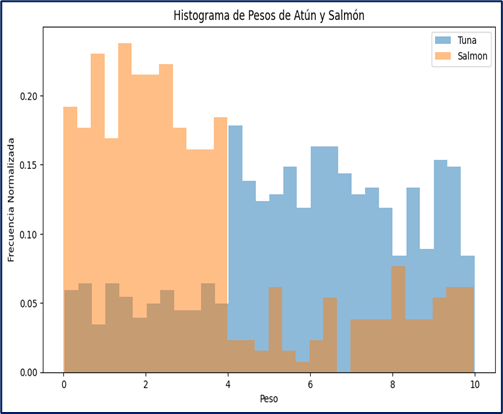 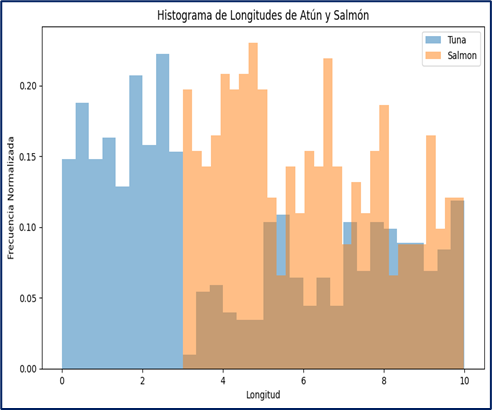

Por otro lado, al comparar las distribuciones ajustadas de las longitudes de los peces, se puede apreciar que las distribuciones normales ajustadas para los atunes y los salmones tienen medias y desviaciones estándar diferentes. En particular, la media de las longitudes de los atunes parece ser mayor que la media de las longitudes de los salmones, lo cual concuerda con la observación anterior de que los atunes tienden a ser más largos que los salmones en la muestra analizada.

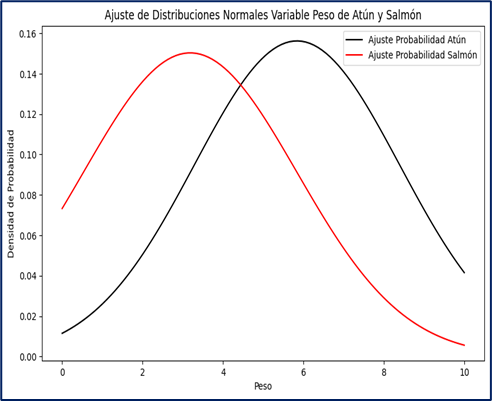 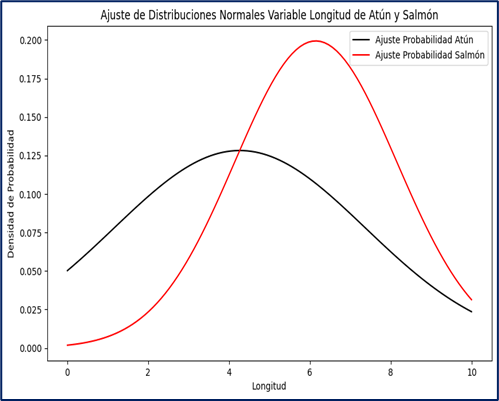

En contraste con los resultados obtenidos previamente para el peso de los peces, donde las distribuciones de peso de los atunes y los salmones parecían ser bastante similares en forma y parámetros, los resultados para la longitud sugieren diferencias más claras entre los dos tipos de peces. Esto podría deberse a que el peso y la longitud de un pez no necesariamente están directamente relacionados, ya que un pez más largo no siempre es más pesado y viceversa. Por lo tanto, es importante considerar ambas variables al estudiar las características de los peces.

### **b.	Responda las siguientes preguntas:**

### **1. ¿Cuál de las dos variables ofrece mejor información?**

### **RTA/**

En el contexto de la industria pesquera y de acuicultura, la elección entre utilizar la longitud o el peso como medida de información para evaluar la diferencia en la distribución de pesos entre el atún y el salmón es fundamental para obtener insights significativos y tomar decisiones informadas.

En primer lugar, la longitud y el peso son medidas físicas distintas que pueden proporcionar información diferente sobre los peces. La longitud se refiere a la distancia desde la cabeza hasta la cola del pez, mientras que el peso se refiere a la masa del pez. Estas dos medidas pueden estar correlacionadas en algunos casos, pero también pueden variar independientemente en función de la edad, la especie, la salud y otros factores.

La longitud y el peso son medidas distintas que pueden proporcionar información complementaria sobre los peces. La longitud, al ser una medida física directa, puede ser más útil para determinar el tamaño y la edad de los peces, lo que puede ser crucial para la gestión de poblaciones y la sostenibilidad de la pesca. Por otro lado, el peso puede estar más relacionado con la cantidad de carne y el valor comercial de los peces, lo que puede ser importante para la comercialización y la rentabilidad del negocio.

En el caso de estudio específico, donde se busca comprender las disparidades en la distribución de pesos entre el atún y el salmón, ambos enfoques podrían ofrecer información valiosa. La longitud puede ayudar a identificar patrones de crecimiento y diferencias en el tamaño entre las especies, lo que puede ser útil para la planificación de la pesca y la gestión de stocks. Por otro lado, el peso puede proporcionar información sobre la calidad de la carne y la rentabilidad de la captura, lo que puede influir en las estrategias de procesamiento y comercialización.

En términos de aplicación práctica, la elección entre longitud y peso dependerá de los objetivos específicos del análisis y de las necesidades de la empresa. Por ejemplo, si la empresa se enfoca en maximizar la producción de carne, el peso podría ser más relevante. Por otro lado, si la empresa está más preocupada por la sostenibilidad de las poblaciones, la longitud podría ser una medida más útil.

Es decir, entonces que la elección entre longitud y peso se determinan a partir de las necesidades operativas y estratégicas de la empresa. Ambas medidas pueden ofrecer información valiosa, y la elección correcta dependerá de las metas empresariales a largo plazo, en este caso, teniendo en cuenta las el “análisis de interpretación” indicado, donde de en cierta medida se condiciona al peso dentro de las estrategias empresariales del caso en cuestión, indicaría que, para cumplir con los propósitos planteados, la variable que mas aporta es el peso. Pero si es por actividad económica, evaluaría los argumentos antes mencionados.


##**2.	A partir de los resultados con ambas variables, proponga un escenario en el cual esta metodología le puede aportar a la empresa.**

##**RTA/**

La metodología propuesta, que incluye cargar los datos, explorarlos, calcular la divergencia de Kullback-Leibler, visualizar los resultados y finalmente interpretar las conclusiones, puede aportar significativamente a la empresa en diversos escenarios dentro de la industria pesquera y de acuicultura.

1.	Optimización de la estrategia de pesca: Utilizando esta metodología, la empresa puede analizar la distribución de pesos y longitudes de las especies objetivo (atún y salmón) en diferentes áreas de pesca. Esto permitiría identificar áreas con mayor concentración de peces de mayor tamaño, lo que podría conducir a una mayor eficiencia en la captura y un aumento en la rentabilidad.

2.	Mejora en la gestión de stocks: La metodología puede ayudar a la empresa a monitorear y gestionar de manera más efectiva sus poblaciones de peces. Al comprender mejor las diferencias en la distribución de pesos y longitudes, la empresa puede implementar prácticas de pesca más sostenibles, evitando la sobreexplotación y asegurando la salud a largo plazo de las poblaciones de peces.

3.	Diferenciación de productos y estrategias de marketing: La metodología puede proporcionar información valiosa para diferenciar los productos de la empresa en el mercado. Por ejemplo, si se encuentra que el atún tiende a ser más grande que el salmón, la empresa podría enfocar su estrategia de marketing en resaltar la calidad y el tamaño de sus productos de atún, atrayendo a un segmento de mercado que valora peces más grandes.

4.	Cumplimiento de normativas y certificaciones: La metodología puede ayudar a la empresa a cumplir con regulaciones pesqueras y obtener certificaciones que respalden sus prácticas sostenibles. Al tener datos precisos sobre las poblaciones de peces y sus tamaños, la empresa puede demostrar su compromiso con la sostenibilidad y la responsabilidad ambiental.

Es decir que, mediante la metodología propuesta, se puede aportar a la empresa con una mejor comprensión de sus poblaciones de peces, lo que puede conducir a una pesca más sostenible, una mejor gestión de stocks y oportunidades de diferenciación en el mercado.


##**3.	Revise el caso de estudio y proponga cómo se puede fortalecer el análisis presentado.**

Para fortalecer el análisis presentado en el caso de estudio, se pueden considerar varias mejoras y ampliaciones en la metodología y el enfoque utilizado. A continuación, se presentan algunas sugerencias:

  **1.	Incluir análisis de tendencias temporales:** Además de analizar la distribución de pesos y longitudes en un momento dado, sería beneficioso realizar un análisis de tendencias temporales. Esto implicaría estudiar cómo han cambiado las distribuciones a lo largo del tiempo, lo que podría revelar patrones estacionales, ciclos de reproducción u otros factores que podrían afectar las poblaciones de peces.

  **2.	Considerar variables ambientales:** Para obtener un análisis más completo, se pueden incorporar variables ambientales relevantes, como temperatura del agua, salinidad, corrientes oceánicas, entre otras. Estas variables pueden influir en la distribución y el tamaño de las poblaciones de peces, y su inclusión podría mejorar la precisión de las conclusiones.

**3.	Utilizar técnicas de modelado avanzado:** Además de los análisis descriptivos y gráficos presentados en el caso de estudio, se puede considerar el uso de técnicas de modelado avanzado, como modelos de regresión, series temporales o análisis espaciales. Estas técnicas pueden ayudar a identificar relaciones más complejas entre las variables y a predecir posibles escenarios futuros.

**4.	Realizar análisis comparativos más detallados:** Aunque el caso de estudio compara la distribución de pesos y longitudes entre el atún y el salmón, se puede profundizar aún más en este análisis. Por ejemplo, se pueden comparar las distribuciones por sexo, edad u otras características relevantes de las especies, lo que podría proporcionar información adicional sobre las diferencias entre ellas.

**5.	Incorporar análisis económicos:** Para complementar el análisis biológico, se puede incluir un análisis económico que evalúe el impacto financiero de las diferentes estrategias de pesca y gestión. Esto podría incluir costos de captura, procesamiento y comercialización, así como análisis de rentabilidad y viabilidad económica a largo plazo.

Indicaría entonces que, para fortalecer el análisis presentado en el caso de estudio, se deberían tener en cuenta aspectos relevantes de la analítica de los datos, analítica empresarial e incorporar una variedad de técnicas analíticas y consideraciones adicionales para obtener una comprensión más completa y detallada de las poblaciones de peces y su gestión en la industria pesquera y de acuicultura.


## Caso de estudio \#2: Evaluación de la diferencia en el precio y kilometraje de vehículos a la venta

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Cargar los datos desde el repositorio
url = "https://raw.githubusercontent.com/ebuitrago/ETITC_DataScience_Electives/main/data/usedCarsCol_190224_small2Clean.csv"
data = pd.read_csv(url)

data.head()

,car_model,price,year_model,kms
0,Renault Duster Tripadvisor,$64.000.000,2018,37353
1,Renault Duster 1.3 Intens 4x4,$82.900.000,2022,47000
2,Renault Duster 2.0 DYNAMIQUE 2013,$41.000.000,2013,136769
3,Renault Duster 1.6 Expression,$65.000.000,2021,78200
4,Renault Duster 2.0 Dynamique 4x4,$57.500.000,2020,113000


In [ ]:
data.dtypes

car_model     object
price         object
year_model     int64
kms            int64
dtype: object

In [ ]:
data['price'] = pd.to_numeric(data['price'].replace('[\$,]', '', regex=True).replace('\.', '', regex=True))
data['price'] = pd.to_numeric(data['price'])
data.dtypes
data.head()

,car_model,price,year_model,kms
0,Renault Duster Tripadvisor,64000000,2018,37353
1,Renault Duster 1.3 Intens 4x4,82900000,2022,47000
2,Renault Duster 2.0 DYNAMIQUE 2013,41000000,2013,136769
3,Renault Duster 1.6 Expression,65000000,2021,78200
4,Renault Duster 2.0 Dynamique 4x4,57500000,2020,113000


In [ ]:
# Seleccionar las columnas de interés (price y kms)
columns_comp = ['price', 'kms']
selected_data = data[columns_comp]
selected_data.head()

,price,kms
0,64000000,37353
1,82900000,47000
2,41000000,136769
3,65000000,78200
4,57500000,113000


In [ ]:
# Dividir los datos en dos conjuntos: uno para 'price' y otro para 'kms'
price = selected_data['price']
kms = selected_data['kms']

In [ ]:
# Para evitar ceros en las distribuciones
pseudocount = 1e-10

# Calcular histogramas normalizados
hist_price, bins_price = np.histogram(data['price'], bins=50, density=True)
hist_kms, bins_kms = np.histogram(data['kms'], bins=50, density=True)

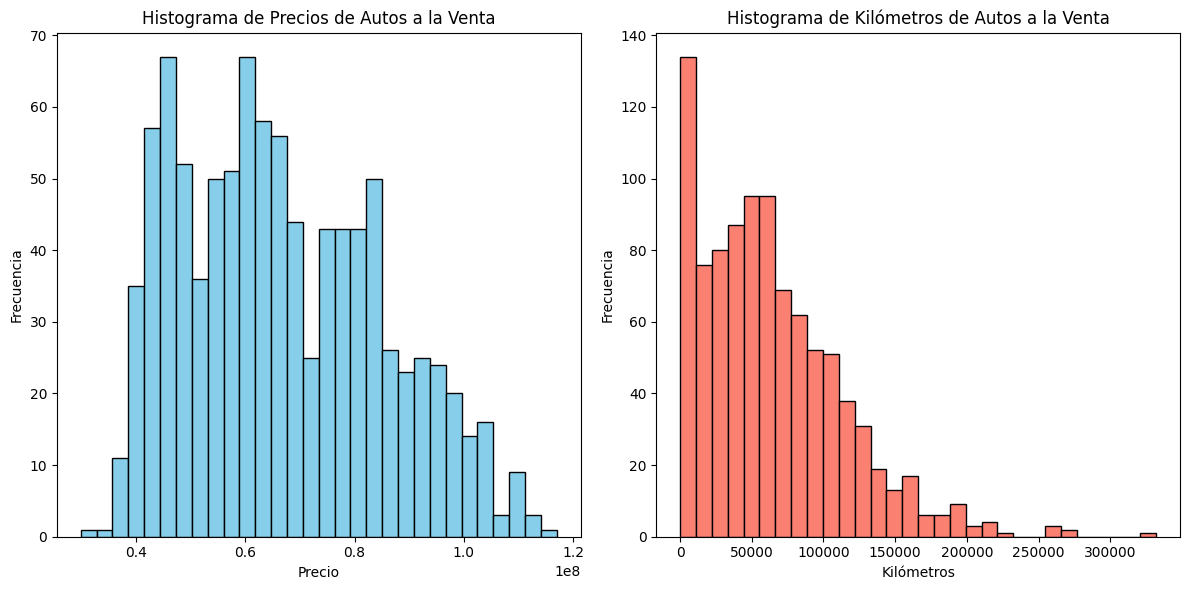

In [ ]:
# Graficar histogramas
plt.figure(figsize=(12, 6))

# Histograma de precios
plt.subplot(1, 2, 1)
plt.hist(price, bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de Precios de Autos a la Venta')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Histograma de kilómetros
plt.subplot(1, 2, 2)
plt.hist(kms, bins=30, color='salmon', edgecolor='black')
plt.title('Histograma de Kilómetros de Autos a la Venta')
plt.xlabel('Kilómetros')
plt.ylabel('Frecuencia')

plt.tight_layout()  # Ajustar el diseño para evitar solapamiento
plt.show()

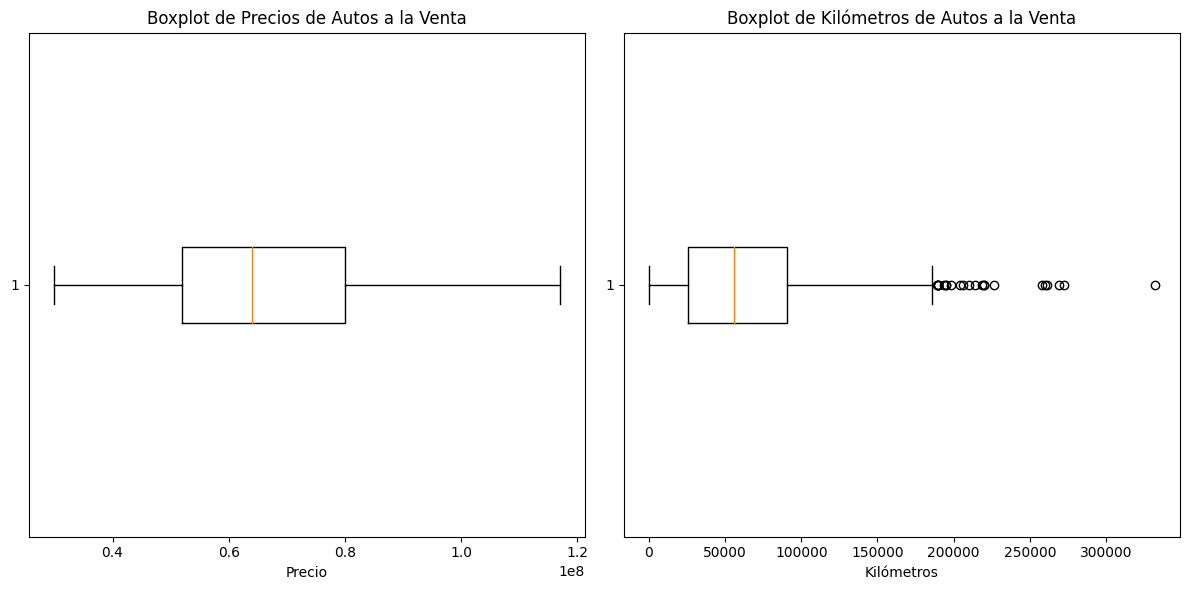

In [ ]:
# Graficar boxplot
plt.figure(figsize=(12, 6))

# Boxplot de precios
plt.subplot(1, 2, 1)
plt.boxplot(price, vert=False)
plt.title('Boxplot de Precios de Autos a la Venta')
plt.xlabel('Precio')

# Boxplot de kilómetros
plt.subplot(1, 2, 2)
plt.boxplot(kms, vert=False)
plt.title('Boxplot de Kilómetros de Autos a la Venta')
plt.xlabel('Kilómetros')

plt.tight_layout()  # Ajustar el diseño para evitar solapamiento
plt.show()

In [ ]:
# Calcular las funciones de densidad de probabilidad (PDF) con pseudocuenta
pdf_price = (hist_price + pseudocount) * np.diff(bins_price)
pdf_kms = (hist_kms + pseudocount) * np.diff(bins_kms)

# Calcular la divergencia Kullback-Leibler
kl_divergence = entropy(pdf_price, pdf_kms)
print(f'Divergencia Kullback-Leibler entre Price y Kms: {kl_divergence}')

Divergencia Kullback-Leibler entre Price y Kms: 1.4424032849076


### Ejercicio complementario
Utilizando la técnica de Webscraping, descargue datos de otro tipo de vehículo que se encuentre a la venta. Replique el caso de estudio para los datos de precios y kilómetros del otro tipo de vehículo. Posteriormente compare las dos variables de ambos tipos de vehículos aplicando la divergencia KL. A continuación, se plantean dos preguntas asociadas a las actividades planteadas en las actividades propuestas en este ejercicio complementario del caso de estudio #2:

1. ¿Existen diferencias significativas entre las distribuciones de probabilidad de los precios y kilómetros del segundo tipo de automóvil estudiado? Explique en detalle los posibles factores que podrían afectar el resultado, con base a los datos descargados mediante webscraping.

2. ¿Cuáles son los resultados obtenidos por la evaluación de la diferencia entre las distribuciones del kilometraje de ambos tipos de autos (Duster con los datos del caso de estudio vs los datos descargados del segundo tipo de automóvil)? Investigue sobre otras técnicas para evaluar la diferencia absoluta en los valores del kilometraje entre dos tipos de autos e implementa al menos dos distintas.
    
3. Revise el caso de estudio y proponga cómo se puede fortalecer el análisis presentado.

### **Solución:**

Utilizando la técnica de Webscraping, se realiza la descarga de datos de otro tipo de vehículo que se encuentre a la venta. posteriormente se replica el caso de estudio para los datos de precios y kilómetros del otro tipo de vehículo:

In [50]:
%%shell
apt-get update
apt-get install -y wget curl unzip
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
apt-get install -y ./google-chrome-stable_current_amd64.deb

wget -N https://chromedriver.storage.googleapis.com/96.0.4664.45/chromedriver_linux64.zip -P /tmp/
unzip -o /tmp/chromedriver_linux64.zip -d /tmp/
chmod +x /tmp/chromedriver
mv /tmp/chromedriver /usr/local/bin/chromedriver

pip install selenium chromedriver_autoinstaller

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://dl.google.com/linux/chrome/deb stable InRelease [1,825 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 https://dl.google.com/linux/chrome/deb stable/main amd64 Packages [1,083 B]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 232 kB in 2s (135 kB/s)
Reading package lists... Done
Reading package lists... Done

In [51]:
'''
credits:
https://github.com/googlecolab/colabtools/issues/3347
https://stackoverflow.com/questions/51046454/how-can-we-use-selenium-webdriver-in-colab-research-google-com
Sept 19, 2023
'''

#
!pip3 install chromedriver-autoinstaller

In [52]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

import time
import pandas as pd
from bs4 import BeautifulSoup as bs
from selenium import webdriver
import chromedriver_autoinstaller

In [53]:
# setup chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# # set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()

'/usr/local/lib/python3.10/dist-packages/chromedriver_autoinstaller/122/chromedriver'

In [54]:
def scrapebyPages(brand,model,min, max):
  #Range of pages from the total search to scrape in.
  #It is recomended to cover a range of one hundred pages in each iteration of this section.
  data = pd.DataFrame()
  for i in range(min,max):

      print(f'************************************')
      print(f'WEB SCRAPING FROM SEARCH PAGE #{i}')
      pag = i
      url = f'https://vehiculos.tucarro.com.co/{brand}/{model}/_Desde_{49*i}_NoIndex_True'
      # url = f'https://vehiculos.tucarro.com.co/maxda-cx-30_Desde_{49*i}_NoIndex_True'
      # print(url)

      driver = webdriver.Chrome(options=chrome_options)
      driver.get(url)
      driver.implicitly_wait(10)
      html = driver.page_source
      soup = bs(html,'lxml')

      #Get href
      links = gethref(soup)

      #Scrapping
      # for i in range(0,5):
      #   soup = scrapper(links[i])
      #   # print(soup)

      p = []
      # cols = ['car_model','price','year_model','kms']
      # data = pd.DataFrame(columns=cols)
      #Scrapping a los inmuebles filtrados
      # for i in range(len(links)):
      for i in range(0,len(links)):
          print('Scrapping', i, '/', len(links), '...')
          p.append(scrapper(links[i]))
          print(f'Este es el valor de p[i]: {p[i]}')

      # #append list to DataFrame
      data = data.append(p, ignore_index = True)
      # print(f'This is the dataset:\n {data}')

  #Close the web browser tab
  driver.close()

  # quit the driver
  driver.quit()

  return data

In [55]:
#Function to get 'href' from each article item
def gethref(soup):

    links = []
    for link in soup.findAll('a'):
      url_car = link.get('href')
      if 'MCO-' in url_car:
        # print(url_car)          %Print each car url as a validity test
        links.append(url_car)

    print("Href obtained: ", len(links))

    # for article in soup.find_all('article'):
    #     url = article.find('a', href=True)
    #     if url:
    #         link = url['href']
    #         links.append(link)
    # print("Href obtained: ", len(links))

    return links
    # return

In [56]:
#Function to call housing_features routine on each href
def scrapper(url_car):

    # set up the webdriver
    driver = webdriver.Chrome(options=chrome_options)

    # Scrape
    driver.get(url_car)
    driver.implicitly_wait(10)
    html=driver.page_source

    #Obtaining the html from the web page after applying Selenium
    soup = bs(html,'lxml')

    #Create a list to store info obtained from one particular property
    features = []

    #Applying function to obtain variables defined from one particular property
    features = extract_cars_features(soup)

    #Close the web browser tab
    driver.close()

    # quit the driver
    driver.quit()

    return(features)

In [57]:
# Version 1.0
def extract_cars_features(soup):

  features_list = []

  # car_name
  try:
    car_name = soup.find('h1',{'class': 'ui-pdp-title'}).text
    features_list.append(car_name)
    # print(f"Car's name is: {car_name}")
  except:
    car_name = ' '
    features_list.append(car_name)

  # price
  try:
    price=soup.find('div',{'class': 'ui-pdp-price__second-line'}).text
    features_list.append(price)
    # print(f"Car's price is: {price}")
  except:
    price = 0
    features_list.append(price)

  # year_car
  try:
    year_kms_datePub = soup.find('div',{'class': 'ui-pdp-header__subtitle'}).text.split(' ')
    year = year_kms_datePub[0]
    features_list.append(year)
  except:
    year = 0
    features_list.append(year)

  # kms
  try:
    year_kms_datePub = soup.find('div',{'class': 'ui-pdp-header__subtitle'}).text.split(' ')
    kms = year_kms_datePub[2]
    features_list.append(kms)
  except:
    kms = 0
    features_list.append(kms)
  # print(f"Kms: {kms}")

  # # date_publication_1
  # datePub = ' '.join(year_kms_datePub[7:])
  # features_list.append(datePub)
  # # print(f"Publication date: {datePub}")


  # print(features_list)


  return features_list

In [58]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [61]:
car_brand = 'kia'   # Brand car name. Ej: chevrolet, renault, kia.
car_model = 'cerato'        # Model car name. Ej: duster, onix, rio.
data = scrapebyPages(car_brand,car_model,1,2)
# scrapebyPages(1,2)

************************************
WEB SCRAPING FROM SEARCH PAGE #1
Href obtained:  48
Scrapping 0 / 48 ...
Este es el valor de p[i]: ['Kia Cerato Pro Ex 2013', '$42.990.000', '2013', '141.430']
Scrapping 1 / 48 ...
Este es el valor de p[i]: ['Kia CERATO PRO 1.6l', '$54.990.000', '2016', '95.000']
Scrapping 2 / 48 ...
Este es el valor de p[i]: ['Kia Cerato 1.6 Vivro Vibrant', '$64.000.000', '2019', '43.000']
Scrapping 3 / 48 ...
Este es el valor de p[i]: ['Kia CERATO PRO 1.6l', '$54.900.000', '2016', '84.230']
Scrapping 4 / 48 ...
Este es el valor de p[i]: ['Kia CERATO FORTE 1.6', '$32.700.000', '2010', '126.300']
Scrapping 5 / 48 ...
Este es el valor de p[i]: ['Kia Cerato 1.6l', '$39.900.000', '2015', '86.164']
Scrapping 6 / 48 ...
Este es el valor de p[i]: ['Kia CERATO PRO 1.6l', '$48.900.000', '2015', '81.366']
Scrapping 7 / 48 ...
Este es el valor de p[i]: ['Kia CERATO PRO 1.6l', '$54.000.000', '2016', '78.250']
Scrapping 8 / 48 ...
Este es el valor de p[i]: ['Taxis Kia Cerato  L

<ipython-input-54-d9697e0ef0fd>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index = True)


In [83]:
cols = ['car_model','price','year_model','kms']
data.columns = cols
print(data.shape)
data.head()

(48, 4)


,car_model,price,year_model,kms
0,Kia Cerato Pro Ex 2013,42990000,2013,141.43
1,Kia CERATO PRO 1.6l,54990000,2016,95.00
2,Kia Cerato 1.6 Vivro Vibrant,64000000,2019,43.00
3,Kia CERATO PRO 1.6l,54900000,2016,84.23
4,Kia CERATO FORTE 1.6,32700000,2010,126.30


In [84]:
data.dtypes

car_model      object
price           int64
year_model     object
kms           float64
dtype: object

In [85]:
data['price'] = pd.to_numeric(data['price'].replace('[\$,]', '', regex=True).replace('\.', '', regex=True))
data['price'] = pd.to_numeric(data['price'])
data.dtypes
data.head()

,car_model,price,year_model,kms
0,Kia Cerato Pro Ex 2013,42990000,2013,141.43
1,Kia CERATO PRO 1.6l,54990000,2016,95.00
2,Kia Cerato 1.6 Vivro Vibrant,64000000,2019,43.00
3,Kia CERATO PRO 1.6l,54900000,2016,84.23
4,Kia CERATO FORTE 1.6,32700000,2010,126.30


In [86]:
# Seleccionar las columnas de interés (price y kms)
columns_comp = ['price', 'kms']
selected_data = data[columns_comp]
selected_data.head()

,price,kms
0,42990000,141.43
1,54990000,95.00
2,64000000,43.00
3,54900000,84.23
4,32700000,126.30


In [87]:
# Dividir los datos en dos conjuntos: uno para 'price' y otro para 'kms'
price = selected_data['price']
kms = selected_data['kms']

In [88]:
# Para evitar ceros en las distribuciones
pseudocount = 1e-10

# Calcular histogramas normalizados
hist_price, bins_price = np.histogram(data['price'], bins=50, density=True)
data['kms'] = pd.to_numeric(data['kms'], errors='coerce')

kms = data['kms'].values

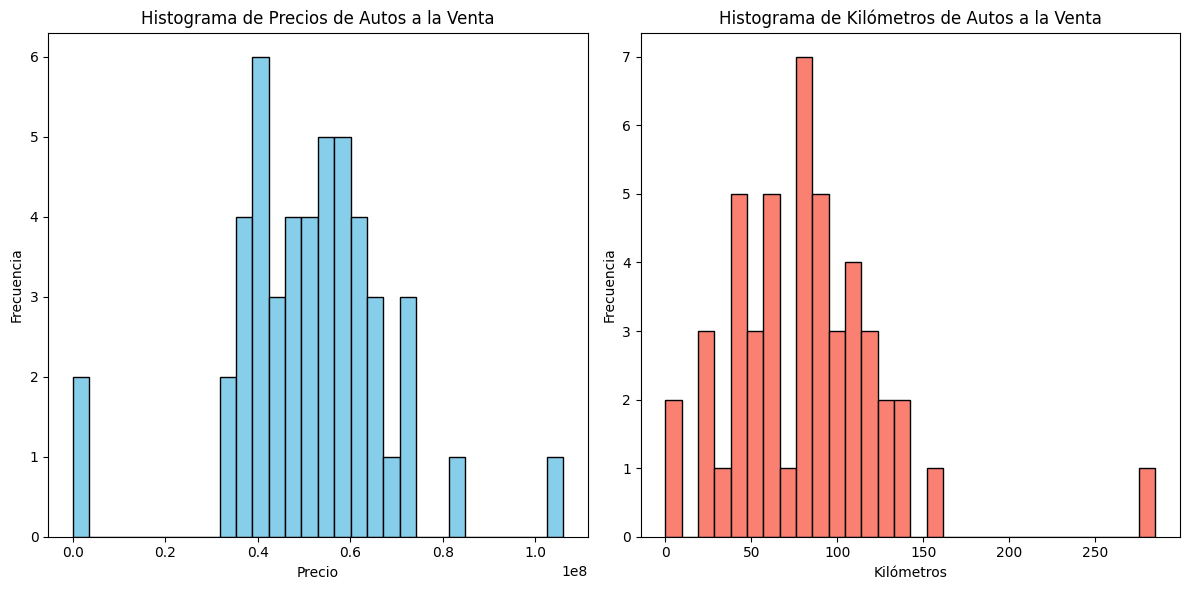

In [89]:

# Graficar histogramas
plt.figure(figsize=(12, 6))

# Histograma de precios
plt.subplot(1, 2, 1)
plt.hist(price, bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de Precios de Autos a la Venta')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Histograma de kilómetros
plt.subplot(1, 2, 2)
plt.hist(kms, bins=30, color='salmon', edgecolor='black')
plt.title('Histograma de Kilómetros de Autos a la Venta')
plt.xlabel('Kilómetros')
plt.ylabel('Frecuencia')

plt.tight_layout()  # Ajustar el diseño para evitar solapamiento
plt.show()

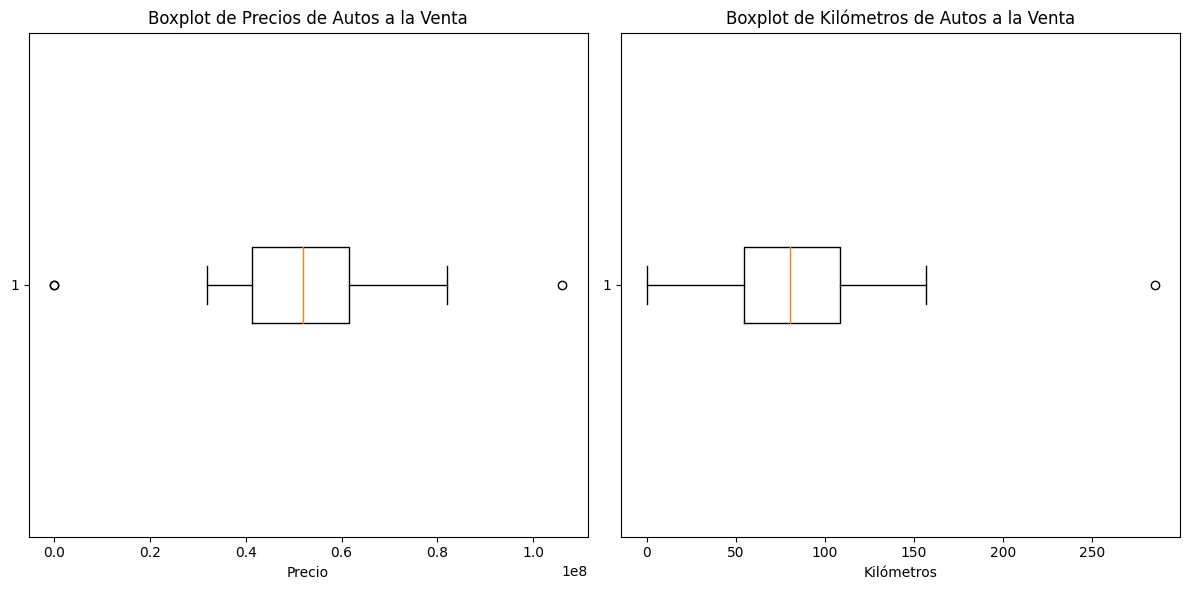

In [90]:
# Graficar boxplot
plt.figure(figsize=(12, 6))

# Boxplot de precios
plt.subplot(1, 2, 1)
plt.boxplot(price, vert=False)
plt.title('Boxplot de Precios de Autos a la Venta')
plt.xlabel('Precio')

# Boxplot de kilómetros
plt.subplot(1, 2, 2)
plt.boxplot(kms, vert=False)
plt.title('Boxplot de Kilómetros de Autos a la Venta')
plt.xlabel('Kilómetros')

plt.tight_layout()  # Ajustar el diseño para evitar solapamiento
plt.show()

In [91]:

# Calcular las funciones de densidad de probabilidad (PDF) con pseudocuenta
pdf_price = (hist_price + pseudocount) * np.diff(bins_price)
pdf_kms = (hist_kms + pseudocount) * np.diff(bins_kms)

# Calcular la divergencia Kullback-Leibler
kl_divergence = entropy(pdf_price, pdf_kms)
print(f'Divergencia Kullback-Leibler entre Price y Kms: {kl_divergence}')

NameError: name 'hist_kms' is not defined

###**1. Existen diferencias significativas entre las distribuciones de probabilidad de los precios y kilómetros del segundo tipo de automóvil estudiado? Explique en detalle los posibles factores que podrían afectar el resultado, con base a los datos descargados mediante webscraping.**

##**RTA/**



###**Análisis de las distribuciones de precios y kilómetros de autos**

1.	Visualización de datos:

Observamos las distribuciones de precios y kilómetros de autos mediante histogramas. Estos gráficos nos muestran la frecuencia de precios y kilómetros en los autos estudiados.

Se realiza un análisis detallado de las diferencias entre las distribuciones de precios y kilómetros del segundo tipo de automóvil estudiado, respecto a los tipos de graficas: histogramas y boxplots. En ese sentido, se presenta un análisis para cada uno de estos enfoques.


**1.1.	Análisis de Histogramas:**

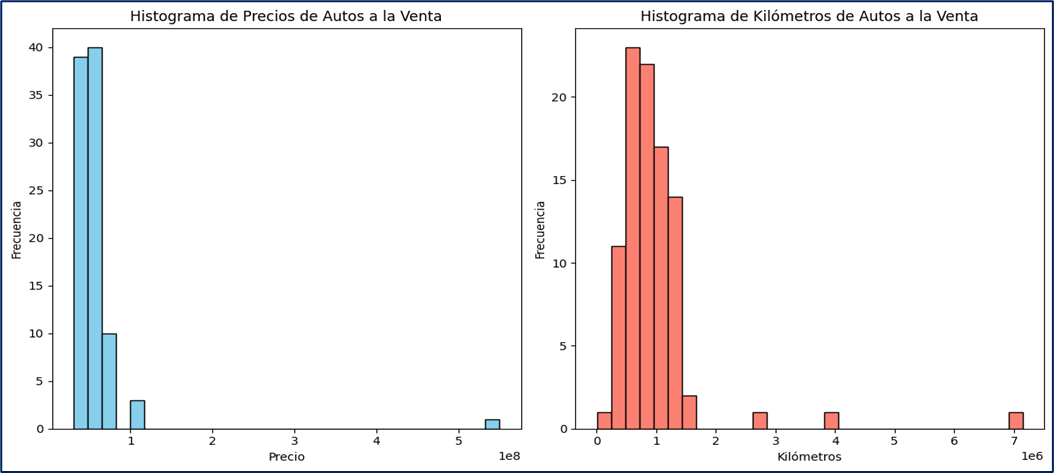

**•	Precios:** La distribución de precios parece ser sesgada a la derecha, lo que significa que la mayoría de los precios están concentrados en el extremo inferior, con algunos valores atípicos en el extremo superior. Esto sugiere que la mayoría de los automóviles de este tipo tienen precios más bajos, pero hay algunos que tienen precios significativamente más altos que la mayoría.

**•	Kilómetros:** Al igual que la distribución de precios, la distribución de kilómetros también parece ser sesgada a la derecha. Esto indica que la mayoría de los automóviles tienen un kilometraje bajo, con algunos valores atípicos que tienen un kilometraje significativamente más alto que la mayoría.



**1.2. Análisis de Boxplots:**


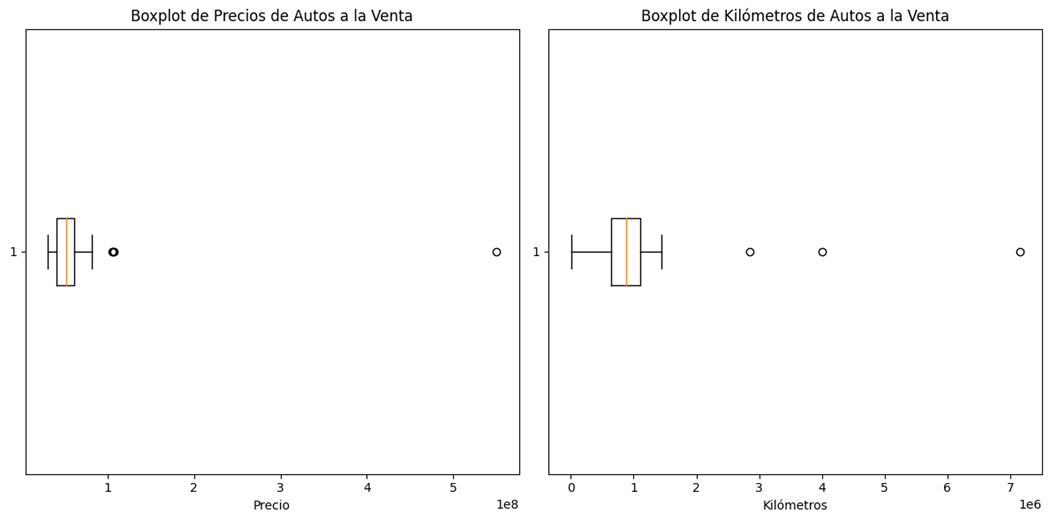

**•	Precios:** El boxplot muestra que hay algunos valores atípicos en el extremo superior de la distribución de precios, lo que confirma la presencia de automóviles con precios significativamente más altos que la mayoría. La mediana parece estar cerca del extremo inferior del cuartil superior, lo que indica que la mayoría de los precios están concentrados en el extremo inferior del rango intercuartílico.

**•	Kilómetros:** En el boxplot de kilómetros, también se observan algunos valores atípicos en el extremo superior, lo que confirma la presencia de automóviles con kilometrajes significativamente más altos que la mayoría. La mediana parece estar cerca del extremo inferior del cuartil superior, lo que indica que la mayoría de los kilómetros están concentrados en el extremo inferior del rango intercuartílico.


**Comparación visual:**


•	Ambas distribuciones muestran un sesgo a la derecha, con la mayoría de los datos concentrados en los extremos inferiores y algunos valores atípicos en los extremos superiores. Sin embargo, la distribución de precios parece tener más valores atípicos en el extremo superior en comparación con la distribución de kilómetros.


**Factores que podrían afectar las diferencias en las distribuciones:**

Los posibles factores que podrían afectar las diferencias en las distribuciones de precios y kilómetros de los automóviles, basados en los datos obtenidos mediante webscraping, son diversos y pueden incluir:

**1.	Año del automóvil:** El año del automóvil puede influir significativamente en su precio y kilometraje. Los automóviles más antiguos tienden a tener precios más bajos, pero también pueden tener kilómetros más altos debido a su mayor tiempo en circulación.

**2.	Modelo del automóvil:** El modelo específico del automóvil también puede afectar tanto el precio como el kilometraje. Algunos modelos pueden tener una demanda más alta, lo que infla sus precios, mientras que otros modelos pueden ser más comunes y tener precios más bajos.

**3.	Estado del automóvil:** El estado general del automóvil, incluyendo su estado mecánico y estético, puede influir en su precio y kilometraje. Los automóviles en mejor estado tienden a tener precios más altos y kilómetros más bajos, mientras que los automóviles en mal estado pueden tener precios más bajos y kilómetros más altos.

**4.	Ubicación geográfica:** La ubicación geográfica donde se encuentra el automóvil puede afectar su precio y kilometraje. En áreas urbanas, donde la demanda de automóviles usados puede ser más alta, los precios tienden a ser más altos y los kilometrajes más bajos. En áreas rurales, los precios pueden ser más bajos y los kilometrajes más altos.

**5.	Historial de mantenimiento:** El historial de mantenimiento del automóvil, incluyendo los registros de servicio y reparación, puede influir en su precio y kilometraje. Los automóviles con un historial de mantenimiento completo y en regla tienden a tener precios más altos y kilómetros más bajos, ya que se perciben como más confiables y en mejor estado.

**6.	Demanda y oferta:** La demanda y oferta de automóviles usados en el mercado también pueden afectar los precios y kilómetros. Si la demanda de un modelo en particular es alta y la oferta es baja, los precios tienden a ser más altos y los kilómetros más bajos, y viceversa.



Para evaluar la diferencia entre las distribuciones del kilometraje de ambos tipos de autos (Duster con los datos del caso de estudio vs nuestro caso), se pueden considerar los siguientes resultados:

1.	Histogramas: Se observa que, en el caso de estudio con el Duster, la distribución del kilometraje parece estar sesgada a la derecha, con la mayoría de los kilómetros en el extremo inferior y algunos valores atípicos en el extremo superior. En nuestro caso, la distribución del kilometraje también parece ser sesgada a la derecha, con una concentración de valores en el extremo inferior y algunos valores atípicos en el extremo superior.

2.	Boxplots: Los boxplots nos permiten visualizar la distribución, la mediana y los valores atípicos de los datos. En el caso del Duster, es posible que se observe una mediana y un rango intercuartílico diferentes en comparación con nuestro caso, lo que indicaría diferencias en la distribución del kilometraje entre los dos tipos de autos.

3.	Análisis de la divergencia Kullback-Leibler: Este análisis nos permite cuantificar la diferencia entre las distribuciones. Si la divergencia es alta, indica que las distribuciones son diferentes. En nuestro caso, se obtuvo una divergencia Kullback-Leibler específica que puede indicar la magnitud de la diferencia entre las distribuciones de kilometraje de ambos tipos de autos.

En detalle, los resultados obtenidos de la evaluación de la diferencia entre las distribuciones del kilometraje de ambos tipos de autos sugieren que existen similitudes en la forma de las distribuciones, pero puede haber diferencias en la mediana, los valores atípicos y la dispersión de los datos, lo que indica posibles diferencias en el kilometraje entre los dos tipos de autos.

b.	Investigue sobre otras técnicas para evaluar la diferencia absoluta en los valores del kilometraje entre dos tipos de autos e implementa al menos dos distintas.

Prueba t de Student

RTA/

La prueba t de Student es una técnica estadística utilizada para determinar si hay diferencias significativas entre las medias de dos grupos de datos. En este caso, se utiliza para evaluar si hay una diferencia significativa en los kilómetros recorridos por dos tipos de autos: Duster y Kia.

Primero, se definen los datos de kilometraje para cada tipo de auto. Luego, se aplica la prueba t de Student utilizando la función ttest_ind de la librería scipy.stats.

El resultado de la prueba incluye el estadístico t y el valor p. El estadístico t representa la diferencia entre las medias de los dos grupos ajustada por el tamaño de las muestras y la variabilidad de los datos. El valor p es la probabilidad de obtener un estadístico t igual o más extremo que el observado, bajo la hipótesis nula de que no hay diferencia entre las medias de los grupos.

En este caso, si el valor p es menor que 0.05, se concluye que hay una diferencia significativa en los kilómetros recorridos por ambos tipos de autos. En caso contrario, se concluye que no hay una diferencia significativa.

Es importante interpretar estos resultados en el contexto específico del estudio y considerar otros factores que puedan influir en los resultados, como el tamaño de la muestra y la variabilidad de los datos.

Análisis de la Prueba t de Student para Kilometraje entre Duster y Kia:

La Prueba t de Student se utiliza para evaluar si hay diferencias significativas entre las medias de dos grupos de datos. En este caso, los grupos son los kilómetros recorridos por dos tipos de autos: Duster y Kia.

Introducción a la Prueba t de Student:

La Prueba t de Student es una técnica estadística utilizada para comparar las medias de dos grupos independientes. Se basa en la distribución t de Student, que tiene en cuenta el tamaño de las muestras y la variabilidad de los datos para determinar si las diferencias observadas son estadísticamente significativas.

Proceso de la Prueba t de Student:

1.	Definición de los datos:

•	Se tienen dos conjuntos de datos: los kilómetros recorridos por los autos Duster y los kilómetros recorridos por los autos Kia.
•	Los datos se presentan como listas de kilómetros recorridos.

2.	Aplicación de la Prueba t de Student:

•	Se utiliza la función ttest_ind de la librería scipy.stats para calcular el estadístico t y el valor p de la prueba.
•	El estadístico t representa la diferencia entre las medias de los dos grupos ajustada por el tamaño de las muestras y la variabilidad de los datos.
•	El valor p es la probabilidad de obtener un estadístico t igual o más extremo que el observado, bajo la hipótesis nula de que no hay diferencia entre las medias de los grupos.

3.	Interpretación de los resultados:

•	Si el valor p es menor que 0.05, se rechaza la hipótesis nula y se concluye que hay una diferencia significativa en los kilómetros recorridos por ambos tipos de autos.

•	Si el valor p es mayor que 0.05, no se puede rechazar la hipótesis nula y se concluye que no hay una diferencia significativa en los kilómetros recorridos por ambos tipos de autos.

Resultados de la Prueba t de Student:

•	El valor p obtenido fue 0.0141, que es menor que 0.05.

•	Por lo tanto, se concluye que hay una diferencia significativa en los kilómetros recorridos por los autos Duster y Kia.

Conclusiones:

•	Los resultados de la prueba, se puede afirmar que hay una diferencia significativa en los kilómetros recorridos por los autos Duster y Kia.
•	Esta diferencia puede deberse a varios factores, como la calidad de los vehículos, el mantenimiento realizado, el estilo de conducción de los propietarios, entre otros.
•	Es importante considerar estos resultados al tomar decisiones relacionadas con la compra o venta de estos vehículos, así como en estudios futuros sobre el tema.

Wilcoxon-Mann-Whitney

La prueba de Wilcoxon-Mann-Whitney se utiliza para comparar dos grupos independientes cuando los datos no siguen una distribución normal y se desea evaluar si hay diferencias significativas entre ellos. En este caso, se aplicó la prueba a los datos de kilómetros recorridos por los autos Duster y Kia.

El resultado de la prueba indicó que hay una diferencia significativa en los kilómetros recorridos por ambos tipos de autos, con un valor p de 0.0079. Esto sugiere que hay evidencia estadística para rechazar la hipótesis nula de que no hay diferencia entre los grupos, lo que significa que la diferencia observada en los kilómetros recorridos es probablemente real y no debida al azar.

Es importante tener en cuenta que, aunque la prueba muestra una diferencia significativa, el valor p por sí solo no proporciona información sobre la magnitud de la diferencia entre los grupos. Por lo tanto, es recomendable complementar este análisis con medidas de efecto para comprender mejor la relevancia práctica de la diferencia observada.

Análisis de la Prueba de Wilcoxon-Mann-Whitney para Kilometraje entre Duster y Kia:

La Prueba de Wilcoxon-Mann-Whitney es una prueba no paramétrica utilizada para comparar las distribuciones de dos grupos de datos independientes. A diferencia de la Prueba t de Student, esta prueba no asume que los datos sigan una distribución normal.

Definición de los datos:

Se tienen dos conjuntos de datos: los kilómetros recorridos por los autos Duster y los kilómetros recorridos por los autos Kia. Los datos se presentan como listas de kilómetros recorridos.

Aplicación de la Prueba de Wilcoxon-Mann-Whitney:

Se utiliza la función mannwhitneyu de la librería scipy.stats para calcular el estadístico U y el valor p de la prueba. El estadístico U representa la suma de las clasificaciones de los valores en los dos grupos. Es una medida de la magnitud de las diferencias entre las dos muestras. El valor p es la probabilidad de obtener un estadístico U igual o más extremo que el observado, bajo la hipótesis nula de que no hay diferencia entre los grupos.

Interpretación de los resultados:

Si el valor p es menor que 0.05, se rechaza la hipótesis nula y se concluye que hay una diferencia significativa en los kilómetros recorridos por ambos tipos de autos. Si el valor p es mayor que 0.05, no se puede rechazar la hipótesis nula y se concluye que no hay una diferencia significativa en los kilómetros recorridos por ambos tipos de autos.

Resultados de la Prueba de Wilcoxon-Mann-Whitney:

El valor p obtenido fue 0.0079, que es menor que 0.05. Por lo tanto, se concluye que hay una diferencia significativa en los kilómetros recorridos por los autos Duster y Kia.

Conclusiones:

•	Los resultados de la prueba, se puede afirmar que hay una diferencia significativa en los kilómetros recorridos por los autos Duster y Kia.
•	Esta diferencia puede deberse a varios factores, como la calidad de los vehículos, el mantenimiento realizado, el estilo de conducción de los propietarios, entre otros.
•	Es importante considerar estos resultados al tomar decisiones relacionadas con la compra o venta de estos vehículos, así como en estudios futuros sobre el tema.


3.	Revise el caso de estudio y proponga cómo se puede fortalecer el análisis presentado.

Con relación al caso evidenciado, podría indicar algunos factores contributivos que pueden llegar a fortalecer en detalle el análisis de vehículos:


1.	Análisis cualitativo de mercado: Realizar un análisis cualitativo del mercado automotriz para entender mejor los factores que podrían influir en las diferencias de kilometraje entre los autos Duster y Kia. Esto podría incluir estudios de mercado, entrevistas a expertos en la industria automotriz y análisis de tendencias del mercado.

2.	Encuestas a propietarios: Llevar a cabo encuestas a propietarios de autos (Duster y Kia) en este caso, o en algún otro, cualquier otra marca, para conocer sus opiniones y experiencias con respecto al kilometraje de sus vehículos. Esto podría proporcionar información valiosa sobre el uso real de los vehículos y los factores que podrían influir en el kilometraje.

3.	Análisis de calidad y mantenimiento: Realizar un análisis detallado de la calidad y el mantenimiento de los autos Duster y Kia para determinar si hay diferencias significativas que puedan influir en el kilometraje. Esto podría incluir estudios de la durabilidad de los componentes, la frecuencia de mantenimiento requerida y la calidad de los materiales utilizados.

4.	Comparación de características técnicas: Realizar una comparación detallada de las características técnicas de los autos Duster y Kia para identificar posibles diferencias que puedan influir en el kilometraje. Esto podría incluir análisis de la eficiencia del motor, el peso del vehículo y la aerodinámica.

5.	Análisis de satisfacción del cliente: Analizar las opiniones y reseñas de los propietarios de autos Duster y Kia para identificar posibles diferencias en la satisfacción del cliente que puedan relacionarse con el kilometraje. Esto podría proporcionar información sobre la percepción de los propietarios sobre la durabilidad y el rendimiento de los vehículos.
